In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

# Сборный проект №1. Анализ компьютерных игр

## Описание проекта

Вы работаете в интернет-магазине, который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

### Описание данных

-	`Name` — название игры
-	`Platform` — платформа
-	`Year_of_Release` — год выпуска
-	`Genre` — жанр игры
-	`NA_sales` — продажи в Северной Америке (миллионы проданных копий)
-	`EU_sales` — продажи в Европе (миллионы проданных копий)
-	`JP_sales` — продажи в Японии (миллионы проданных копий)
-	`Other_sales` — продажи в других странах (миллионы проданных копий)
-	`Critic_Score` — оценка критиков (максимум 100)
-	`User_Score` — оценка пользователей (максимум 10)
-	`Rating` — рейтинг от организации ESRB. Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.


## Обзор данных

In [2]:
df_games = pd.read_csv('/datasets/games.csv') 

In [3]:
df_games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
df_games.isna().mean()

Name               0.000120
Platform           0.000000
Year_of_Release    0.016093
Genre              0.000120
NA_sales           0.000000
EU_sales           0.000000
JP_sales           0.000000
Other_sales        0.000000
Critic_Score       0.513192
User_Score         0.400897
Rating             0.404786
dtype: float64

Предварительно можно сделать несколько выводов:

- В столбцах `Critic_Score`, `User_Score`, `Rating` много пропусков;
- Названия столбцов нужно привести к нижнему регистру;
- В столбцах с категориальными переменными возможны неявные дубликаты; 
- Столбцы `Year_of_Release`, `User_Score`, `Critic_Score` можно попробовать привести в формат `int`;
- Столбцы `User_Score` и `Critic_Score` можно привести к единой системе оценивания - по 100-балльной шкале.

## Предобработка данных

Приведем названия столбцов к нижнему регистру:

In [6]:
df_games.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [7]:
df_games.columns =  df_games.columns.str.lower()

Заполним небольшое количество пропусков в `name` как `unknown` и скорректируем некоторые названия:

In [8]:
df_games.groupby('name')['name'].count().head(7)

name
 Beyblade Burst                1
 Fire Emblem Fates             1
 Frozen: Olaf's Quest          2
 Haikyu!! Cross Team Match!    1
 Tales of Xillia 2             1
'98 Koshien                    1
.hack//G.U. Vol.1//Rebirth     1
Name: name, dtype: int64

In [9]:
df_games['name'] = df_games['name'].fillna('unknown')

In [10]:
df_games['name'] = df_games['name'].replace(
    [' Beyblade Burst', ' Fire Emblem Fates', " Frozen: Olaf's Quest", ' Haikyu!! Cross Team Match!', ' Tales of Xillia 2'], 
    ['Beyblade Burst', 'Fire Emblem Fates', "Frozen: Olaf's Quest", 'Haikyu!! Cross Team Match!', 'Tales of Xillia 2']) 

Многие названия игр выглядят как некорректно записанные, но это настоящие названия игр, что можно проверить через поиск в интернете.

In [11]:
df_games['platform'].value_counts() 

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: platform, dtype: int64

В столбце `genre`, как и в `name`, заполним строки с пропусками как `unknown`:

In [12]:
df_games[df_games['genre'].isna() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,unknown,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,unknown,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [13]:
df_games['genre'] = df_games['genre'].fillna('unknown')

Заполним пропуски в столбце с годом:

In [14]:
df_games = df_games.fillna({'year_of_release' : df_games.groupby('name')['year_of_release'].transform('first')})

In [15]:
df_games['year_of_release'].isna().mean()

0.008734669458570146

In [16]:
df_games['rating'].isna().mean()

0.4047861202512713

In [17]:
df_games['rating'] = df_games['rating'].replace('K-A', 'E')

В столбце с рейтингом много пропусков, попробуем их заполнить через группировку по имени и по жанру: 

In [18]:
df_games = df_games.fillna({'rating' : df_games.groupby(['name'])['rating'].transform('first')})

In [19]:
df_games['rating'].isna().mean()

0.37864193837870175

Оставшиеся заполним как `unknown`:

In [20]:
df_games['rating'] = df_games['rating'].fillna('unknown')

В столбце `user_score` присутствует аббревиатура `tbd`, которая означает, что оценка будет определена позднее. Вероятно, оценку в базе не обновили после анонса. 

Т.к. это значение ничего нам не говорит, переведем его в NaN, чтобы работать с ним как с другими пропусками:

In [21]:
df_games['user_score'] = pd.to_numeric(df_games['user_score'], errors='coerce')

In [22]:
df_games['user_score'].isna().mean()

0.5459168411606342

Приведем к 100-балльной системе:

In [23]:
df_games['user_score'] = df_games['user_score'] * 10

Заполним пропуски в столбце `critic_score`:

In [24]:
df_games = df_games.fillna({'critic_score' : df_games.groupby(['name', 'year_of_release'])['critic_score'].transform('median')})
df_games = df_games.fillna({'critic_score' : df_games.groupby(['name'])['critic_score'].transform('median')})

Заполним пропуски в столбце `user_score`:

In [25]:
df_games = df_games.fillna({'user_score' : df_games.groupby(['name', 'year_of_release'])['user_score'].transform('median')}) 
df_games = df_games.fillna({'user_score' : df_games.groupby('name')['user_score'].transform('median')}) 

Посчитаем суммарные продажи во всех регионах:

In [26]:
df_games['all_sales'] = df_games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

Дубликаты не обнаружены:

In [27]:
df_games.duplicated().sum()

0

Проверим изменения:

In [28]:
df_games.isna().mean()

name               0.000000
platform           0.000000
year_of_release    0.008735
genre              0.000000
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.455698
user_score         0.480168
rating             0.000000
all_sales          0.000000
dtype: float64

In [29]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16569 non-null  float64
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     9098 non-null   float64
 9   user_score       8689 non-null   float64
 10  rating           16715 non-null  object 
 11  all_sales        16715 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.5+ MB


В столбцах с оценками `user_score` и `critic_score` осталось много пропусков, вероятно, в открытых источниках, откуда были взяты данные, не было информации о многих играх, либо она была закрытой.

Скорее всего, по этой же причине были пропуски в столбце `rating`.

## Исследовательский анализ данных

Посмотрим, сколько игр выпускалось в разные годы:

<AxesSubplot:>

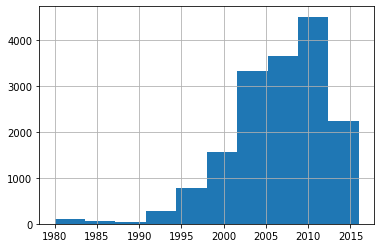

In [30]:
df_games['year_of_release'].hist()

<AxesSubplot:xlabel='year_of_release'>

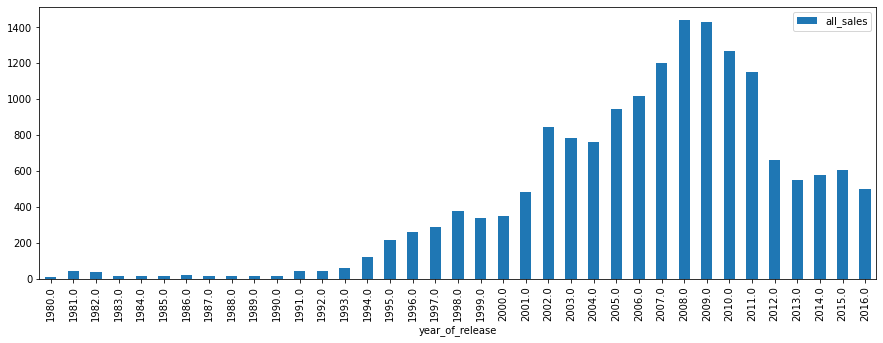

In [31]:
df_games.pivot_table(
    index='year_of_release', values='all_sales', aggfunc='count').plot(
    kind='bar', figsize=(15, 5))

По графику видно, что активный рост популярности видеоигр начался после 2000 года и продолжался до 2008 года, далее наблюдаем спад популярности, который останавливается к 2012-2013 годам.

Для исследования нам будут нужны данные за актуальный период, возможно, период после 2011 года.

Найдем платформы с наибольшими суммарными продажами:

In [32]:
df_games.pivot_table(
    index='platform', values='all_sales', aggfunc='sum').sort_values(
    by='all_sales', ascending=False).reset_index().head(15)

,platform,all_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12
5,PS,730.86
6,GBA,317.85
7,PS4,314.14
8,PSP,294.05
9,PC,259.52


In [33]:
top_platform = df_games.query("platform == ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']")

In [34]:
top_platform = top_platform.dropna(subset=['year_of_release']).reset_index(drop=True)
top_platform['year_of_release'] = top_platform['year_of_release'].astype('int')

Построим распределение по годам:

<AxesSubplot:xlabel='year_of_release'>

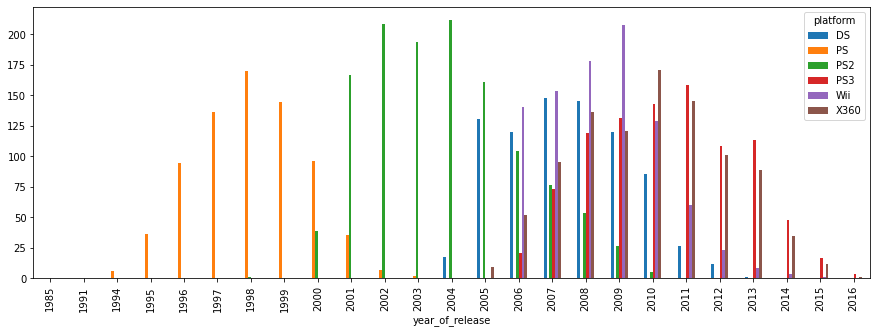

In [35]:
top_platform.pivot_table(
    index='year_of_release', columns='platform', values='all_sales', aggfunc='sum').plot(
    kind='bar', figsize=(15, 5))

<AxesSubplot:xlabel='year_of_release'>

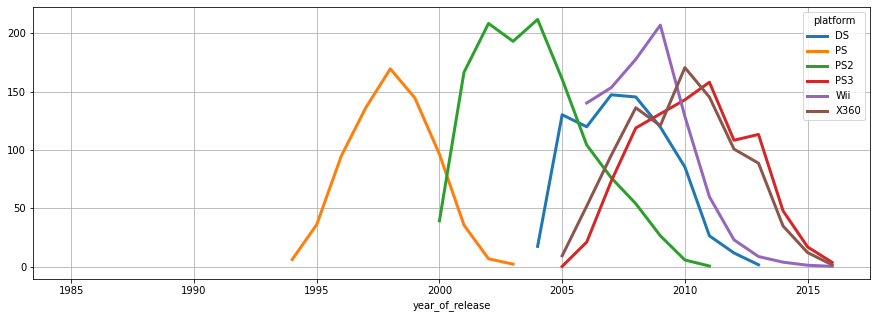

In [36]:
top_platform.pivot_table(
    index='year_of_release', columns='platform', values='all_sales', aggfunc='sum').plot(
    kind='line', figsize=(15, 5), grid=True, linewidth=3)

По графику можем наблюдать некоторый цикл "жизни" платформы - пика популярности платформа достигает примерно на 4-6 год выпуска, далее ее популярность начинает снижаться, после чего на замену приходит другая платформа и за 1-2 года достигает своего пика.

Для дальнейшего исследования возьмем данные за период после 2011 года, т.е. за последние 6 лет, включая 2016 год.

In [37]:
actual_games = df_games.query("year_of_release >= 2011").reset_index(drop=True)
actual_games['year_of_release'] = actual_games['year_of_release'].astype('int')

In [38]:
actual_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,82.0,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,81.0,M,16.27
2,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,34.0,M,14.73
3,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
4,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60


Определим, какие платформы лидируют по продажам и выберем несколько потенциально прибыльных платформ:

In [39]:
actual_games.pivot_table(
    index='platform', values='all_sales', aggfunc='sum').sort_values(
    by='all_sales', ascending=False).reset_index()

,platform,all_sales
0,PS3,447.69
1,X360,382.75
2,PS4,314.14
3,3DS,258.21
4,XOne,159.32
5,PC,98.67
6,Wii,96.39
7,WiiU,82.19
8,PSV,53.81
9,DS,39.54


In [40]:
actual_games.isna().mean()

name               0.000000
platform           0.000000
year_of_release    0.000000
genre              0.000000
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.441017
user_score         0.422261
rating             0.000000
all_sales          0.000000
dtype: float64

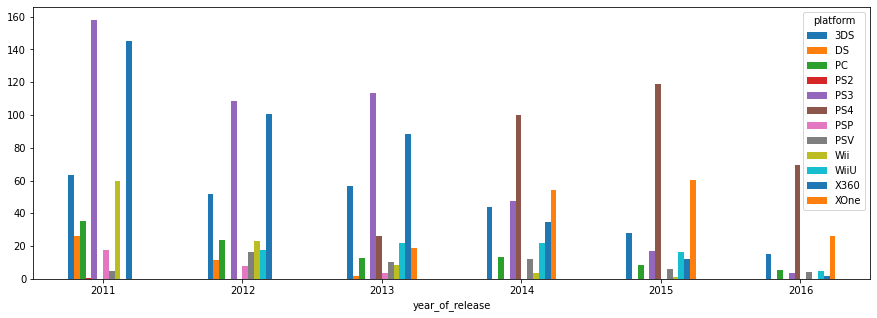

In [41]:
actual_games.pivot_table(
    index='year_of_release', columns='platform', values='all_sales', aggfunc='sum').plot(
    kind='bar', figsize=(15, 5), stacked=False,)

plt.xticks(rotation=0)

In [42]:
top_actual_games = actual_games.query("platform == ['PS3', 'X360', 'PS4', '3DS', 'XOne']").reset_index(drop=True)

In [43]:
top_actual_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,82.0,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,81.0,M,16.27
2,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,34.0,M,14.73
3,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
4,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60


Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам:

[(0.0, 2.0)]

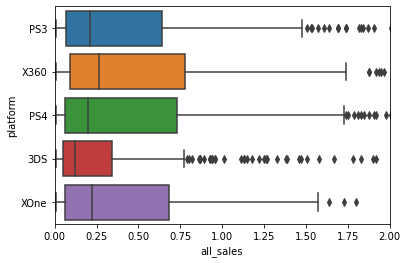

In [44]:
sns.boxplot(
    data=top_actual_games, x='all_sales', y='platform').set(
    xlim=(0, 2))

По графику видно, что нормальные значения у большинства платформ схожи - примерно до 1,7 млн проданных копий, для платформы 3DS - до 0,8 млн.

Наиболее частые значения находятся в диапазоне от 0,05 до 0,80 млн копий, для платформы 3DS - примерно до 0,35 млн. 

Также видим, что медианы стремятся влево - в сторону уменьшения.

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 

In [45]:
ps_3 = actual_games.query("platform == ['PS3']").reset_index(drop=True)

In [46]:
ps_3.head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,82.0,M,21.05
1,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,53.0,M,13.79
2,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,5.54,5.73,0.49,1.57,88.0,32.0,M,13.33


Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами:

In [47]:
ps_3[['user_score', 'critic_score', 'all_sales']].corr()

,user_score,critic_score,all_sales
user_score,1.000000,0.454992,0.027082
critic_score,0.454992,1.000000,0.348412
all_sales,0.027082,0.348412,1.000000


<AxesSubplot:xlabel='user_score', ylabel='all_sales'>

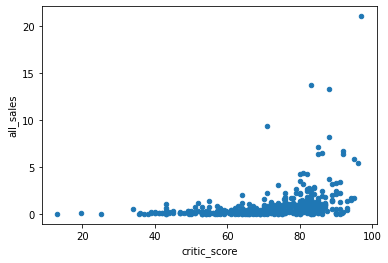

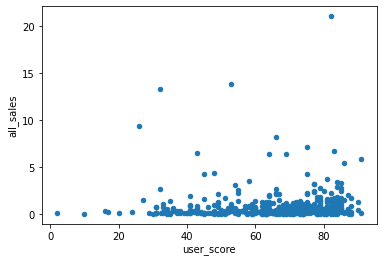

In [48]:
ps_3.plot(x='critic_score', y='all_sales', kind='scatter')
ps_3.plot(x='user_score', y='all_sales', kind='scatter')

Значительная корреляция с оценкой критиков не обнаружена, с оценкой пользователей корреляции нет. По графикам заметна некоторая зависимость - с увеличением оценки число продаж несколько увеличивается. Большинство проданных игр были с оценками выше среднего.

Посмотрим, как влияют на продажи отзывы пользователей и критиков для остальных платформ: 

In [49]:
top_without_ps3 = actual_games.query("platform == ['X360', 'PS4', '3DS', 'XOne']").reset_index(drop=True)

In [50]:
top_without_ps3[['user_score', 'critic_score', 'all_sales']].corr()

,user_score,critic_score,all_sales
user_score,1.000000,0.503959,0.044226
critic_score,0.503959,1.000000,0.353993
all_sales,0.044226,0.353993,1.000000


<AxesSubplot:xlabel='user_score', ylabel='all_sales'>

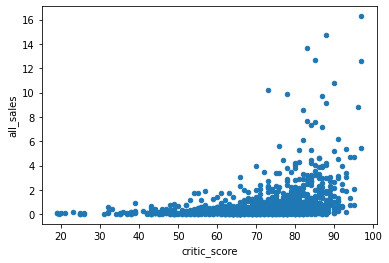

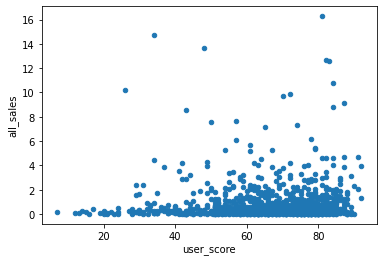

In [51]:
top_without_ps3.plot(x='critic_score', y='all_sales', kind='scatter')
top_without_ps3.plot(x='user_score', y='all_sales', kind='scatter')

По анализу остальных 4 платформ можно увидеть примерно ту же картину:

С оценкой пользователей также корреляции нет, с оценкой критиков небольшая корреляция. По графикам, особенно с оценками критиков, заметна некоторая зависимость - с увеличением оценки число продаж увеличивается. Также большинство проданных игр с оценками выше среднего.

Посмотрим на общее распределение игр по жанрам. 

<AxesSubplot:xlabel='genre'>

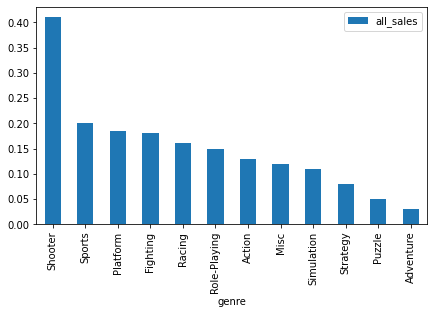

In [52]:
actual_games.pivot_table(
    index='genre', values='all_sales', aggfunc='median').sort_values(
    by='all_sales', ascending=False).plot(
    kind='bar', figsize=(7, 4))

- Наиболее прибыльные жанры связаны с активными действиями пользователя в игре - жанры `Shooter`, `Platform` и `Sports`. 
- Наименее прибыльные: `Adventure`, `Puzzle` и `Strategy`.

## Портрет пользователя каждого региона

### Определим для пользователя каждого региона (NA, EU, JP) самые популярные платформы (топ-5):

In [53]:
actual_games.pivot_table(
    index='platform', values='na_sales', aggfunc='sum').sort_values(
    by='na_sales', ascending=False).head()

,na_sales
platform,
X360,228.18
PS3,168.96
PS4,108.74
XOne,93.12
3DS,82.83


In [54]:
actual_games.pivot_table(
    index='platform', values='eu_sales', aggfunc='sum').sort_values(
    by='eu_sales', ascending=False).head()

,eu_sales
platform,
PS3,164.15
PS4,141.09
X360,117.87
3DS,61.46
PC,57.38


In [55]:
actual_games.pivot_table(
    index='platform', values='jp_sales', aggfunc='sum').sort_values(
    by='jp_sales', ascending=False).head()

,jp_sales
platform,
3DS,100.62
PS3,49.40
PSP,24.28
PSV,21.84
PS4,15.96


Во всех исследуемых регионах схожий топ-5 по платформам, но есть некоторые различия: 
- в Америке в топ попала платформа XOne; 
- в Европе - PC;
- в Японии - PSP и PSV, а на 1 место вышла платформа 3DS.

Также можно заметить, что объем продаж среди популярных платформ больше всего в Северной Америке, а наименьший в Японии. Но стоит учесть, что население Японии в 4-5 раз меньше населения и Северной Америки, и Европы. Если посмотреть с такой стороны, то получается, что в Японии видеоигры все-таки популярнее, чем в Северной Америке или Европе.

### Самые популярные жанры (топ-5):

In [56]:
actual_games.pivot_table(
    index='genre', values='na_sales', aggfunc='sum').sort_values(
    by='na_sales', ascending=False).head()

,na_sales
genre,
Action,234.41
Shooter,194.45
Sports,108.70
Role-Playing,83.78
Misc,69.81


In [57]:
actual_games.pivot_table(
    index='genre', values='eu_sales', aggfunc='sum').sort_values(
    by='eu_sales', ascending=False).head()

,eu_sales
genre,
Action,202.17
Shooter,148.05
Sports,88.67
Role-Playing,62.30
Racing,40.58


In [58]:
actual_games.pivot_table(
    index='genre', values='jp_sales', aggfunc='sum').sort_values(
    by='jp_sales', ascending=False).head()

,jp_sales
genre,
Role-Playing,79.87
Action,63.63
Misc,17.85
Fighting,12.38
Platform,12.13


Топ жанров в Европе и Северной Америке очень схожи, но есть некоторые отличия - в Америке в топе присутствует жанр `Misc`, а в Европе - `Racing`.

В Японии топ жанров заметно отличается - на 1 месте жанр `Role-Playing`, который менее популярен в других регионах, также в топе присутствуют жанры `Fighting` и `Platform`, которые в топ других регионов не попали.

Различия в жанровых предпочтениях могут быть связаны с культурными особенностями регионов.

### Определим, влияет ли рейтинг ESRB на продажи в отдельном регионе:

<AxesSubplot:xlabel='rating'>

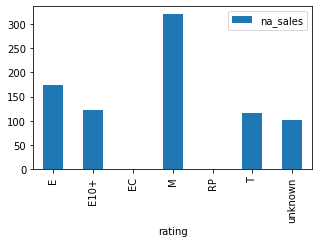

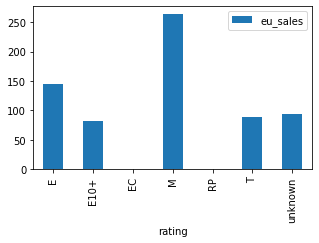

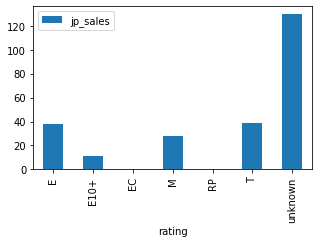

In [59]:
actual_games.pivot_table(
    index='rating', values='na_sales', aggfunc='sum').plot(
    kind='bar', figsize=(5, 3), stacked=False)

actual_games.pivot_table(
    index='rating', values='eu_sales', aggfunc='sum').plot(
    kind='bar', figsize=(5, 3), stacked=False)

actual_games.pivot_table(
    index='rating', values='jp_sales', aggfunc='sum').plot(
    kind='bar', figsize=(5, 3), stacked=False)

Распределение продаж по рейтингу в Европе и Северной Америке практически идентичны - наиболее продаваемы игры с рейтингом `М`, т.е. «для взрослых».

В Японии наиболее популярные игры имеют рейтинг `Т` - для подростков и `E` - для всех. Игры с рейтингом `Е10+` - для всех от 10 лет, менее популярны, чем в Европе и Америке.

Также видим, что в Японии большое количество игр не имеют рейтинга.

## Проверим гипотезы

Подготовим данные:

In [60]:
actual_games_xbox = actual_games.query('platform == "XOne"').dropna(subset=['user_score']).reset_index(drop=True)
actual_games_pc = actual_games.query('platform == "PC"').dropna(subset=['user_score']).reset_index(drop=True)

In [61]:
actual_games_action = actual_games.query('genre == "Action"').dropna(subset=['user_score']).reset_index(drop=True)
actual_games_sports = actual_games.query('genre == "Sports"').dropna(subset=['user_score']).reset_index(drop=True)

In [62]:
alpha = 0.05 # критический уровень статистической значимости
             # если p-value окажется меньше него - отвегнем гипотезу

### Гипотеза #1

Для сравнения двух выборок воспользуемся методом `ttest_ind`, который дает возможность сравнить средние значения массивов между собой.

- Нулевая гипотеза - средние пользовательские рейтинги платформ Xbox One и PC равны;
- Альтернативная гипотеза - рейтинги не равны.

In [63]:
np.var(actual_games_xbox['user_score'], ddof=1)

189.52889533506985

In [64]:
np.var(actual_games_pc['user_score'], ddof=1)

259.23408111285266

Дисперсии выборок считаем неравными.

In [65]:
result_platform = st.ttest_ind(actual_games_xbox['user_score'], actual_games_pc['user_score'], equal_var=False)

In [66]:
result_platform.pvalue < alpha

False

Так как p-value оказался больше 0.05, мы не отвергаем нулевую гипотезу.

### Гипотеза #2

Для сравнения двух выборок также воспользуемся методом `ttest_ind`.

- Нулевая гипотеза - средние пользовательские рейтинги жанров `Action` и `Sports` равны;
- Альтернативная гипотеза - рейтинги не равны.


In [67]:
np.var(actual_games_action['user_score'], ddof=1)

180.52260826028433

In [68]:
np.var(actual_games_sports['user_score'], ddof=1)

279.53052311610924

Дисперсии выборок считаем неравными.

In [69]:
result_genre = st.ttest_ind(actual_games_action['user_score'], actual_games_sports['user_score'], equal_var=False)

In [70]:
result_genre.pvalue < alpha

True

Так как p-value оказался меньше 0.05, мы отвергаем нулевую гипотезу.

В итоге мы выяснили, что средние пользовательские рейтинги жанров `Action` и `Sports`, скорее всего, не равны между собой, а средние пользовательские рейтинги платформ `Xbox One` и `PC`, вероятно, могут быть равны.

## Общий вывод

Опишем выявленные закономерности, определяющие успешность игры:

- выпущена на одной или нескольких из платформ: `PS3`, `X360`, `PS4`, `3DS`, `XOne`;

- - для Европы и Северной Америки: `X360`, `PS3`, `PS4`;
- - для Японии: `3DS`, `PS3`, `PSP`;

- в жанре `Shooter`, `Platform` или `Sports` - наиболее прибыльные;

- - для Европы и Северной Америки: `Action`, `Shooter`, `Sports`;
- - для Японии: `Role-Plaing`, `Action`, `Misc`;

- имеет высокие оценки критиков и пользователей;
- рейтинг определен как `М`, `Т` или `Е` - для взрослых, подростков или для всех, соответственно.